# Object Classification

In [1]:
# Install Tensorflow
#!pip install tensorflow

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version: 2.15.0


In [2]:
# Zero dimensional tensor
zero_dim_tensor = tf.constant(20)
print(zero_dim_tensor)

# One dimensional tensor
one_dim_tensor = tf.constant([12, 20, 53, 26, 11, 56])
print(one_dim_tensor)

# Two dimensional tensor
two_dim_array = [[3, 6, 7, 5], 
                 [9, 2, 3, 4],
                 [7, 1, 10,6],
                 [0, 8, 11,2]]

two_dim_tensor = tf.constant(two_dim_array)
print(two_dim_tensor)

tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor([12 20 53 26 11 56], shape=(6,), dtype=int32)
tf.Tensor(
[[ 3  6  7  5]
 [ 9  2  3  4]
 [ 7  1 10  6]
 [ 0  8 11  2]], shape=(4, 4), dtype=int32)


# Load Data

In [3]:
from tensorflow.keras.datasets import cifar10 as cf10
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

In [39]:
train_labels[1]

array([9], dtype=uint8)

## EDA

In [7]:
# 1. Function for showing images
def show_images(train_images, 
                class_names, 
                train_labels, 
                nb_samples = 12, nb_row = 4):
    
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

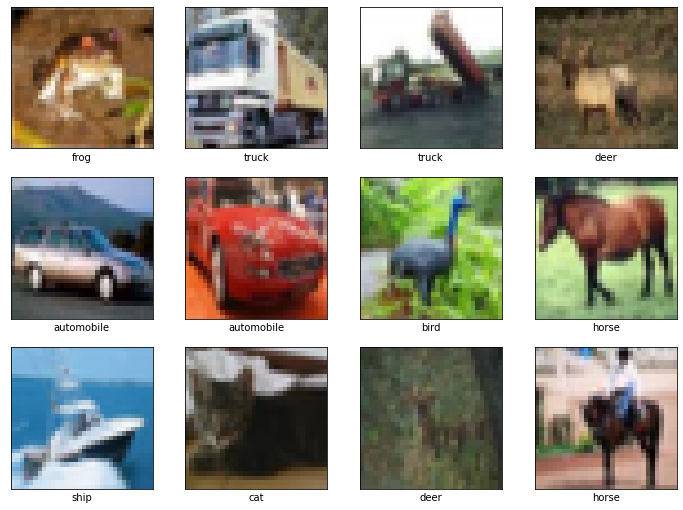

In [8]:
# Visualize some sample images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

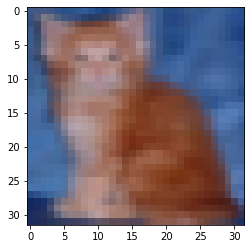

In [24]:
# Visualize a sample images from the dataset
index = 91
plt.imshow(train_images[index]) #display sample training image
plt.show()

In [9]:
# Normalize the x, then convert the output from numerical to categorical
from tensorflow.keras.utils import to_categorical

# Data normalization
x_train = train_images / 255
x_test = test_images / 255

# New categorical name for y
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels, len(class_names))
y_test = to_categorical(test_labels, len(class_names))

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))
print ("The proportion of the train data is " + str(round((len(x_train)/(len(x_train)+len(x_test)))*100,2)) + "%")

number of training examples = 50000
number of test examples = 10000
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)
The proportion of the train data is 83.33%


# 5 Model

## 5.1 Architecture

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

![Arch1.png](Arch1.png)

In [12]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy', 
                   Precision(name='precision'),
                   Recall(name='recall')]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = METRICS)

# Train the model
training_history = model.fit(x_train, y_train, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.4012 - loss: 1.6416 - precision: 0.6546 - recall: 0.1678 - val_accuracy: 0.5959 - val_loss: 1.1234 - val_precision: 0.7314 - val_recall: 0.4446
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6277 - loss: 1.0551 - precision: 0.7647 - recall: 0.4833 - val_accuracy: 0.6523 - val_loss: 0.9972 - val_precision: 0.7549 - val_recall: 0.5494
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6846 - loss: 0.9050 - precision: 0.7917 - recall: 0.5702 - val_accuracy: 0.6745 - val_loss: 0.9316 - val_precision: 0.7748 - val_recall: 0.5814
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7239 - loss: 0.7838 - precision: 0.8164 - recall: 0.6326 - val_accuracy: 0.6869 - val_loss: 0.9107 - val_precision: 0.7807 - val_recall: 0.6031
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7555 - loss: 0.6963 - precision: 0.8375 - recall: 0.6777 - val_accuracy: 0

In [60]:
50000/32

1562.5

In [18]:
def show_performance_curve(training_result, metric, metric_label):
    import numpy as np
    import matplotlib.pyplot as plt
    
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    intersection_indices = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2)).flatten()
    
    # Check if intersection_indices is not empty
    if intersection_indices.size > 0:
        intersection_idx = intersection_indices[0]
        intersection_value = train_perf[intersection_idx]
    else:
        # Handle the case where no intersection is found
        intersection_idx = None
        intersection_value = None
        print("No intersection found within the given tolerance.")
    
    plt.plot(train_perf, label=metric_label + ' (Training)')
    plt.plot(validation_perf, label=metric_label + ' (Validation)')
    if intersection_idx is not None:
        plt.plot(intersection_idx, intersection_value, 'ro')  # Mark the intersection point
        plt.text(intersection_idx, intersection_value, f'Intersection at index {intersection_idx}', fontsize=9)
    plt.title('Training and Validation ' + metric_label)
    plt.xlabel('Epochs')
    plt.ylabel(metric_label)
    plt.legend()
    plt.show()

No intersection found within the given tolerance.


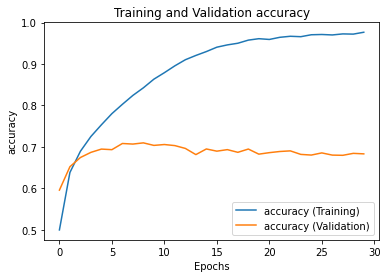

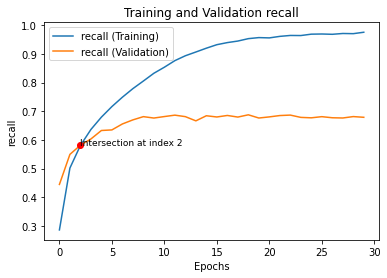

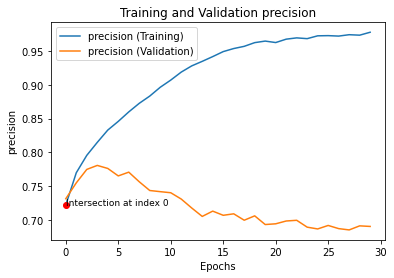

In [25]:
show_performance_curve(training_history, 'accuracy', 'accuracy')
show_performance_curve(training_history, 'recall', 'recall')
show_performance_curve(training_history, 'precision', 'precision')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


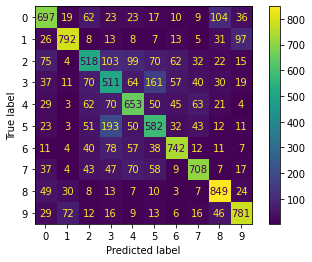

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain the model's predictions on the test dataset
test_predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()